2023-11-16

BBME 520

Assignment 10 part A

Javid Janna

In [1]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib
from matplotlib import pyplot as plt
import sklearn

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:,0] # gives subject age on standard units after z-scoring

data_n = output_variable.size
sets_n = 43

input_variables = [None]*sets_n

for i in range(sets_n):

    if not (i==0): # this saves time as we dont need to load all of the sets
        continue

    atlas_nii = index_img(crad['scorr_mean'], i); #this needs to be modified for some tasks
    masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True);
    input_variables[i] = masker.fit_transform(brain_data.gray_matter_maps);
    print('%i regions found in this atlas' % (len(np.unique(atlas_nii.get_fdata().ravel())) - 1))

input_variable =  input_variables[0]

C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\datasets\struct.py:850: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\datasets\atlas.py:269: FutureWarning: The default behavior of the function will be deprecated and replaced in release 0.13 to use the new parameters homogeneity and grp_mean.
  warnings.warn(


10 regions found in this atlas


C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


In [4]:
import sklearn
from sklearn import mixture
from sklearn import cluster
import time

p_freq_trainer = sklearn.linear_model.Ridge(alpha=1.0 , max_iter= 10000)
p_baye_trainer = sklearn.linear_model.BayesianRidge()

In [22]:
#task 6

degree = 5

out = output_variable

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

outsamp_accuracies = np.zeros((degree))

print('Progress:')

for i in range(degree):
    inp = sklearn.preprocessing.PolynomialFeatures(i+1,include_bias=False).fit_transform(input_variable) #degree 5 is not happening

    model = p_freq_trainer.fit(inp[train],out[train])

    outsamp_accuracies[i] = model.score(inp[test],out[test])

    print('sample ', i+1, ' finished with ', inp.shape[1],' terms')

Progress:
sample  1  finished with  10  terms
sample  2  finished with  65  terms
sample  3  finished with  285  terms
sample  4  finished with  1000  terms
sample  5  finished with  3002  terms


C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=3.87916e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Text(0.5, 1.0, 'Model accuracy by degree of polynomial')

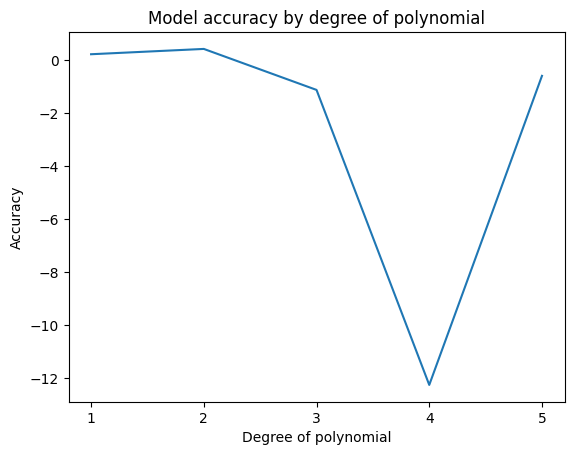

In [24]:
plt.plot(outsamp_accuracies);
plt.xticks(np.arange(outsamp_accuracies.size),np.arange(outsamp_accuracies.size)+1);
plt.xlabel('Degree of polynomial');
plt.ylabel('R^2 value');
plt.title('Model accuracy by degree of polynomial')

Degree 5 polynomial failed to train properly here.

In [17]:
#task 7

degree = 5


out = output_variable

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

outsamp_accuracies = np.zeros((degree))

print('Progress:')

for i in range(degree): 
    inp = sklearn.preprocessing.PolynomialFeatures(i+1,include_bias=False).fit_transform(input_variable)

    model = p_baye_trainer.fit(inp[train],out[train])

    outsamp_accuracies[i] = model.score(inp[test],out[test])

    print('sample ', i+1, ' finished with ', inp.shape[1],' terms')

Progress:
sample  1  finished with  10  terms
sample  2  finished with  65  terms
sample  3  finished with  285  terms
sample  4  finished with  1000  terms
sample  5  finished with  3002  terms


Text(0.5, 1.0, 'Model accuracy by degree of polynomial')

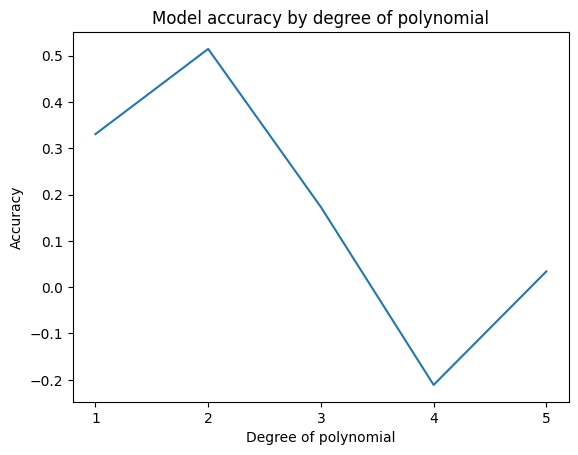

In [18]:
plt.plot(outsamp_accuracies);
plt.xticks(np.arange(outsamp_accuracies.size),np.arange(outsamp_accuracies.size)+1);
plt.xlabel('Degree of polynomial');
plt.ylabel('R^2 value');
plt.title('Bayesian model accuracy by degree of polynomial')

In [26]:
#task 8

degree = 2
clusters = 20

out = output_variable
poly_inp = sklearn.preprocessing.PolynomialFeatures(degree,include_bias=False).fit_transform(input_variable)

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

outsamp_accuracies = np.zeros((clusters))

print('Progress:',end = ' ')

for i in range(clusters):
    for j in range(20): #we take average over 20 trials with kmeans clustering

        inp = sklearn.cluster.KMeans(i+1, n_init='auto').fit_transform(poly_inp) 

        model = p_freq_trainer.fit(inp[train],out[train])

        outsamp_accuracies[i] += model.score(inp[test],out[test])

    print(i+1,end=' ')

outsamp_accuracies/=20

Progress: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

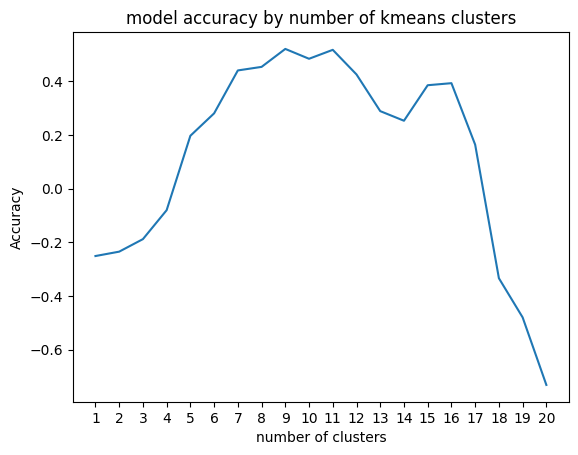

In [28]:
plt.plot(outsamp_accuracies);
plt.xticks(np.arange(outsamp_accuracies.size),np.arange(outsamp_accuracies.size)+1);
plt.xlabel('number of clusters');
plt.ylabel('R^2 value');
plt.title('model accuracy by number of kmeans clusters');

In [35]:
#task 9

degree = 2
clusters = 20

out = output_variable
poly_inp = sklearn.preprocessing.PolynomialFeatures(degree,include_bias=False).fit_transform(input_variable)

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

outsamp_accuracies = np.zeros((clusters))

print('Progress:',end = ' ')

for i in range(clusters):

    gmm_trainer = sklearn.mixture.GaussianMixture(i+1)

    for j in range(20): 

        gmm = gmm_trainer.fit(poly_inp) 
        inp = gmm.predict_proba(poly_inp) 

        model = p_freq_trainer.fit(inp[train],out[train])

        outsamp_accuracies[i] += model.score(inp[test],out[test])

    print(i+1,end=' ')
        

outsamp_accuracies/=20

Progress: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

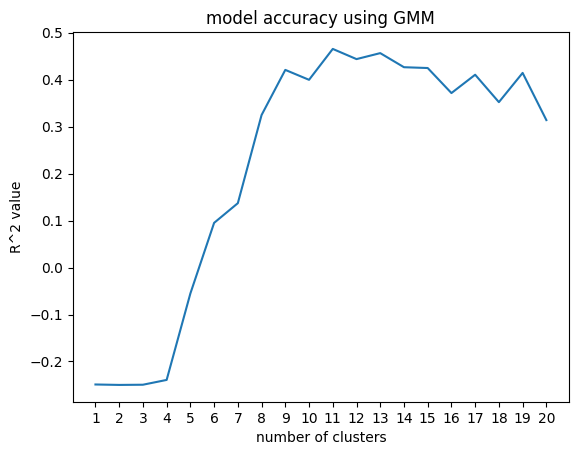

In [36]:
plt.plot(outsamp_accuracies);
plt.xticks(np.arange(outsamp_accuracies.size),np.arange(outsamp_accuracies.size)+1);
plt.xlabel('number of clusters');
plt.ylabel('R^2 value');
plt.title('model accuracy using GMM');

In [40]:
#task 5

degree = 7

out = output_variable

NINETY = int(out.size*0.9)
linspace = np.arange(out.size)
train = linspace < NINETY
test = linspace >= NINETY

times = np.zeros((degree))

print('Progress:')

for i in range(degree): 
    inp = sklearn.preprocessing.PolynomialFeatures(i+1,include_bias=False).fit_transform(input_variable)

    t_start = time.time()

    model = p_baye_trainer.fit(inp[train],out[train])

    t_end = time.time()

    times[i] = t_end - t_start

    print('sample ', i+1, ' finished with ', inp.shape[1],' terms')

times*= 1000

Progress:
sample  1  finished with  10  terms
sample  2  finished with  65  terms
sample  3  finished with  285  terms
sample  4  finished with  1000  terms
sample  5  finished with  3002  terms
sample  6  finished with  8007  terms
sample  7  finished with  19447  terms


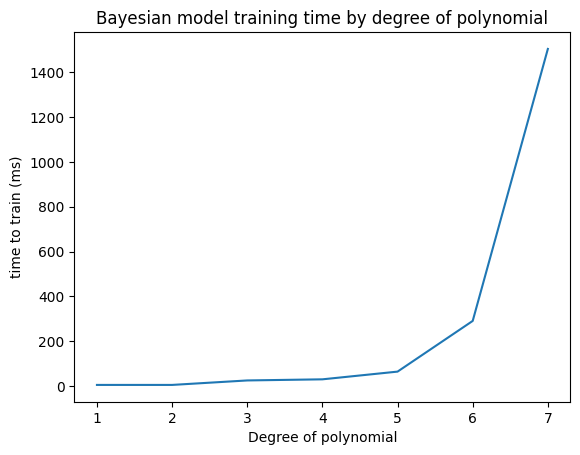

In [38]:
plt.plot(times);
plt.xticks(np.arange(times.size),np.arange(times.size)+1);
plt.xlabel('Degree of polynomial');
plt.ylabel('time to train (ms)');
plt.title('Bayesian model training time by degree of polynomial');